## Apple price prediction

Problem Description - The goal is to train a regression model to predict the average price per kilogram for Golden Delicious Apples from explanatory features

### Importing Libraries

In [1]:
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Visualisations
#import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import math
import pickle
import pandas as pd
import numpy as np

####  Loading .csv files

In [2]:
# increasing row visability 
pd.set_option('display.max_rows', 65)

In [3]:
#Loading data
test_set = 'df-test_set.csv'
train_set = 'df-train_set.csv'
train = pd.read_csv(train_set)
test = pd.read_csv(test_set)

In [4]:
#Spliting up index column for exporting
index = test['Index']
test = test.drop('Index',axis=1)

### Brief data overview

#### Looking into the data

In [5]:
train.head()

Province Container Size_Grade  Weight_Kg             Commodities  \
0               CAPE     EC120         1L       12.0      APPLE GRANNY SMITH   
1               CAPE     M4183         1L       18.3  APPLE GOLDEN DELICIOUS   
2            GAUTENG     AT200         1L       20.0       AVOCADO PINKERTON   
3          TRANSVAAL     BJ090         1L        9.0      TOMATOES-LONG LIFE   
4  WESTERN FREESTATE     PP100         1R       10.0   POTATO SIFRA (WASHED)   

         Date  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0  2020-03-10      108.0       112.0       3236.0              29   
1  2020-09-09      150.0       170.0      51710.0             332   
2  2020-05-05       70.0        80.0       4860.0              66   
3  2020-01-20       60.0        60.0        600.0              10   
4  2020-07-14       40.0        45.0      41530.0             927   

   Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
0          348.0              0              9.30  
1         6075.6            822              8.51  
2         1320.0             50              3.68  
3           90.0              0              6.67  
4         9270.0            393              4.48

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


The info command confirms our categorical and numerical features. If a feature (variable) is categorical the Dtype is object and if it is a numerical variable the Dtype is an int64 or float64. This command also shows us that out of the 64376 none of the features contain any null values.

In [7]:
# K date is an object, will have to look into that.

In [8]:
train.shape

(64376, 13)

 Data comprises of 64376 observationns and 12 characteristics whereby one is dependent variable and 12 are indepedent variables

#### Summary of statistics before data is cleaned

In [9]:
train.describe()

Weight_Kg     Low_Price    High_Price   Sales_Total  Total_Qty_Sold  \
count  64376.000000  64376.000000  64376.000000  6.437600e+04    64376.000000   
mean      12.781592     75.651938     89.607858  1.939501e+04      446.104402   
std       35.943052    159.508144    172.223177  4.442192e+04     1184.169758   
min        0.120000      1.000000      1.000000 -5.770000e+04     -595.000000   
25%        7.000000     30.000000     35.000000  1.154000e+03       20.000000   
50%       10.000000     46.000000     55.000000  5.400000e+03      107.000000   
75%       11.000000     80.000000    100.000000  1.877200e+04      390.000000   
max      500.000000   4400.000000   4400.000000  1.134701e+06    39453.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
count   64376.000000   64376.000000          64376.00  
mean     3336.641295     477.646328               NaN  
std      7682.295441    1453.892091               NaN  
min     -5040.000000    -512.000000              -inf  
25%       175.000000       0.000000              4.02  
50%       940.000000      76.000000              6.00  
75%      3250.000000     381.000000              8.67  
max    192230.000000   93193.000000               inf

Looking at the data we noticing that we have negative values in our dataset and we also have inf and NaN which will have to look in to before continuing with our data 

####  Remove 'inf' and look into negative values

In [10]:
# Just having a look at how many rows values are negative
Stock_On_Hand_neg = train[train['Stock_On_Hand'] < 0]
Total_Kg_Sold_neg = train[train['Total_Kg_Sold'] < 0]
Total_Qty_Sold_neg = train[train['Total_Qty_Sold'] < 0]
Sales_Total_neg = train[train['Sales_Total'] < 0]

In [11]:
Stock_On_Hand_neg.shape


(67, 13)

In [12]:
Total_Kg_Sold_neg.shape

(32, 13)

In [13]:
Total_Qty_Sold_neg.shape

(32, 13)

In [14]:
Sales_Total_neg.shape

(43, 13)

Ok all the negative values only amount to a very small part of the data

####  Checking for null values

In [15]:
#Checkcing for null values
train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

The dataset contains no nulls.

####  Cleaning the data

In [16]:
#Convert Date from object to datetime64[ns] 
train["Date"] = pd.to_datetime(train["Date"])
#Extracting month from datetime
train['Date'] = pd.DatetimeIndex(train['Date']).month

In [17]:
# Changing dates from months to seasons
month_list = train['Date'].tolist()

summer = (12,1,2)
autumn = (3,4,5)
winter = (6,7,8)
spring = (9,10,11)
season_list = []

for i in month_list:
    if i in summer:
        season_list.append('summer')
    elif i in autumn:
        season_list.append('autumn')
    elif i in winter:
        season_list.append('winter')
    else:
        season_list.append('spring')

train['Date'] = train['Date'].astype(str)
train['Date'] = season_list

In [18]:
# Province's
# Train

province_list = train['Province'].unique()
western_cape = ('CAPE', 'W.CAPE-BERGRIVER ETC','WEST COAST','WESTERN CAPE - CERES','SOUTHERN CAPE')
eastern_cape = ('NORTH EASTERN CAPE', 'EASTERN CAPE')
freestate = ('WESTERN FREESTATE','SOUTH WESTERN FREE STATE','EASTERN FREESTATE')
gauteng = ('GAUTENG','NORTH WEST')
transvaal = ('TRANSVAAL','ORANGE FREE STATE')
natal = ('NATAL','KWAZULU NATAL')
mpumalanga = ('MPUMALANGA','MPUMALANGA MIDVELD')
other = ('IMPORTS - OUTSIDE RSA', 'OTHER AREAS','NAMIBIA')

province_list = []

for i in train['Province']:
    if i in western_cape:
        province_list.append('western cape')
    elif i in eastern_cape:
        province_list.append('eastern cape')
    elif i in freestate:
        province_list.append('freestate')
    elif i in gauteng:
        province_list.append('gauteng')
    elif i in transvaal:
        province_list.append('transvaal')
    elif i in natal:
        province_list.append('natal')
    elif i in mpumalanga:
        province_list.append('mpumalanga')
    elif i in other:
        province_list.append('other')
    else:
        province_list.append(i)

train['Province'] = province_list

In [19]:
#Replacing infintes with NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [20]:
# Droping nan's
train = train.dropna()

In [21]:
train.shape

(64368, 13)

In [22]:
# Negatives be gone
def negitive_where(df,column):
    listo = df[column].tolist()
    up_dated_listo = []
    for i in listo:
        if i < 0:
            up_dated_listo.append(abs(i))
        else:
            up_dated_listo.append(i)
    
    df[column] = up_dated_listo
    
    return df

In [23]:
negitive_where(train,'avg_price_per_kg').shape
negitive_where(train,'Stock_On_Hand').shape
negitive_where(train,'Total_Kg_Sold').shape
negitive_where(train,'Total_Qty_Sold').shape
negitive_where(train,'Sales_Total').shape

(64368, 13)

####  Summary of Statistics after data is cleaned

In [24]:
train.describe()

Weight_Kg     Low_Price    High_Price   Sales_Total  Total_Qty_Sold  \
count  64368.000000  64368.000000  64368.000000  6.436800e+04    64368.000000   
mean      12.775983     75.649130     89.606784  1.940680e+04      446.300071   
std       35.912807    159.508488    172.225175  4.441990e+04     1184.180060   
min        0.120000      1.000000      1.000000  5.000000e+00        1.000000   
25%        7.000000     30.000000     35.000000  1.160000e+03       20.000000   
50%       10.000000     46.000000     55.000000  5.400000e+03      107.000000   
75%       11.000000     80.000000    100.000000  1.877700e+04      390.000000   
max      500.000000   4400.000000   4400.000000  1.134701e+06    39453.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
count   64368.000000   64368.000000      64368.000000  
mean     3338.179897     477.911602         10.470263  
std      7682.194481    1453.886928         26.124673  
min         0.120000       0.000000          0.010000  
25%       175.000000       0.000000          4.020000  
50%       940.000000      77.000000          6.000000  
75%      3257.400000     381.000000          8.670000  
max    192230.000000   93193.000000       1250.000000

Since the data is now cleaned up, now we can look into it. Looking at 75%ith and max values, we see that there is a notable difference between the two. We can also see that the median value is lesser than the mean value. From the two conclusions, we can see that there are extreme outliers in our dataset.

#### Skewdness and Kurtosis

In [25]:
train.skew()

Weight_Kg           10.755747
Low_Price           10.072748
High_Price           9.519741
Sales_Total          7.373752
Total_Qty_Sold       9.448651
Total_Kg_Sold        7.172040
Stock_On_Hand       13.769291
avg_price_per_kg    11.870173
dtype: float64

We can deduce from the skewness of the data that all features are highly positively skewed.

In [26]:
train.kurtosis()

Weight_Kg           116.235053
Low_Price           123.992372
High_Price          109.771794
Sales_Total          89.399099
Total_Qty_Sold      152.654478
Total_Kg_Sold        83.232281
Stock_On_Hand       437.126561
avg_price_per_kg    252.342773
dtype: float64

From what we can gather, we can see that ALL features having a kurtosis number which is well above 3, indicating a high number of outliers.

### Exploring Numerical Features

#### Boxplots and distribution plots

C:\Users\manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

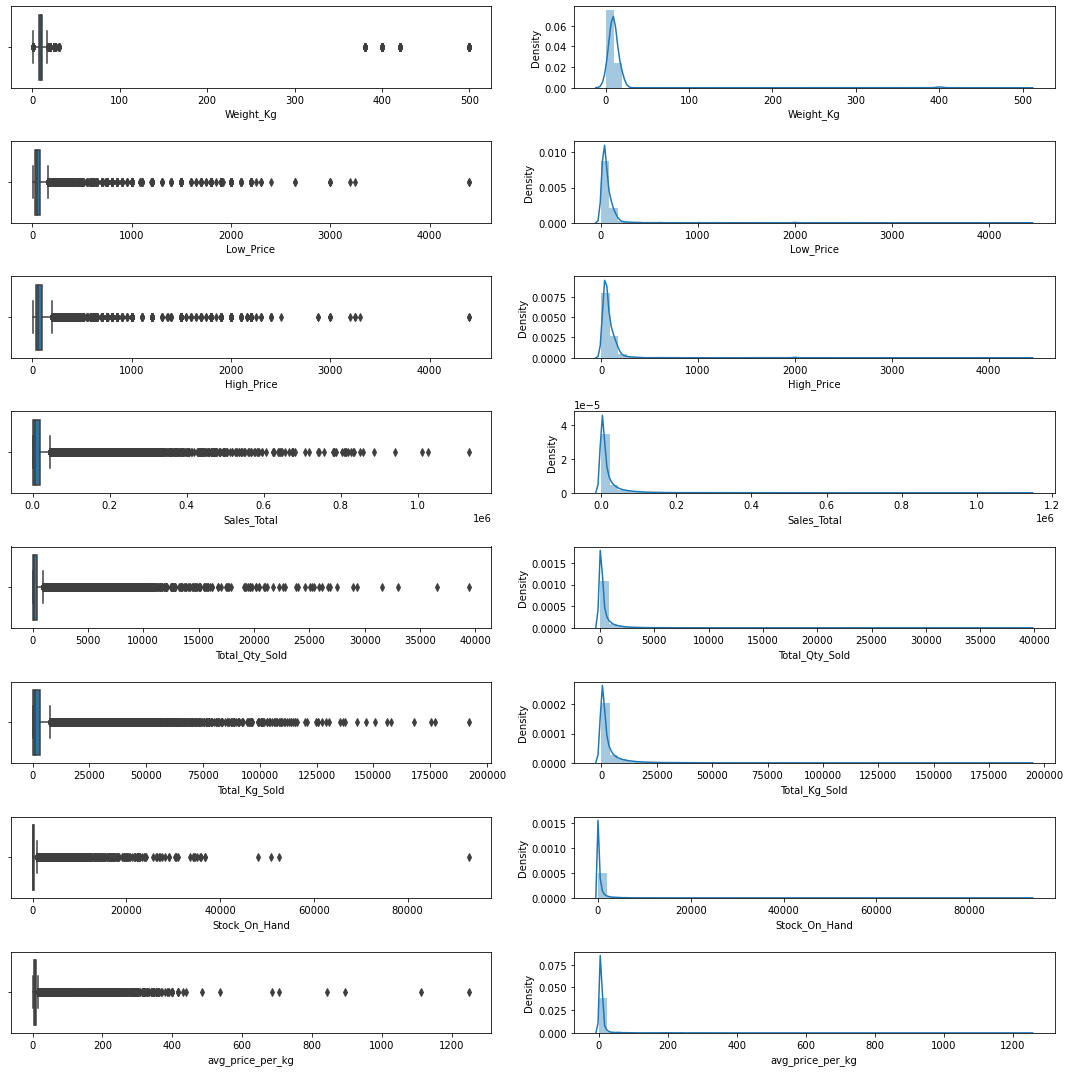

In [27]:
fig, ax = plt.subplots(8, 2, figsize = (15, 15))
sns.boxplot(x= train["Weight_Kg"], ax = ax[0,0])
sns.distplot(train['Weight_Kg'], ax = ax[0,1])
sns.boxplot(x= train["Low_Price"], ax = ax[1,0])
sns.distplot(train['Low_Price'], ax = ax[1,1])
sns.boxplot(x= train["High_Price"], ax = ax[2,0])
sns.distplot(train['High_Price'], ax = ax[2,1])
sns.boxplot(x= train["Sales_Total"], ax = ax[3,0])
sns.distplot(train['Sales_Total'], ax = ax[3,1])
sns.boxplot(x= train["Total_Qty_Sold"], ax = ax[4,0])
sns.distplot(train['Total_Qty_Sold'], ax = ax[4,1])
sns.boxplot(x= train["Total_Kg_Sold"], ax = ax[5,0])
sns.distplot(train['Total_Kg_Sold'], ax = ax[5,1])
sns.boxplot(x= train["Stock_On_Hand"], ax = ax[6,0])
sns.distplot(train['Stock_On_Hand'], ax = ax[6,1])
sns.boxplot(x= train["avg_price_per_kg"], ax = ax[7,0])
sns.distplot(train['avg_price_per_kg'], ax = ax[7,1])
plt.tight_layout()

From the boxplots we can observe that our data is outside the distribution indicating the presence of extreme outliers. the distribution graph shows us that the data is positively/right skewed which means that the average price is higher than than the mean price of apples. Impying more than half of the books are priced lower than the average prices of apples.

#### Histograms

array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Low_Price'}>,
        <AxesSubplot:title={'center':'High_Price'}>],
       [<AxesSubplot:title={'center':'Sales_Total'}>,
        <AxesSubplot:title={'center':'Total_Qty_Sold'}>,
        <AxesSubplot:title={'center':'Total_Kg_Sold'}>],
       [<AxesSubplot:title={'center':'Stock_On_Hand'}>,
        <AxesSubplot:title={'center':'avg_price_per_kg'}>,
        <AxesSubplot:>]], dtype=object)

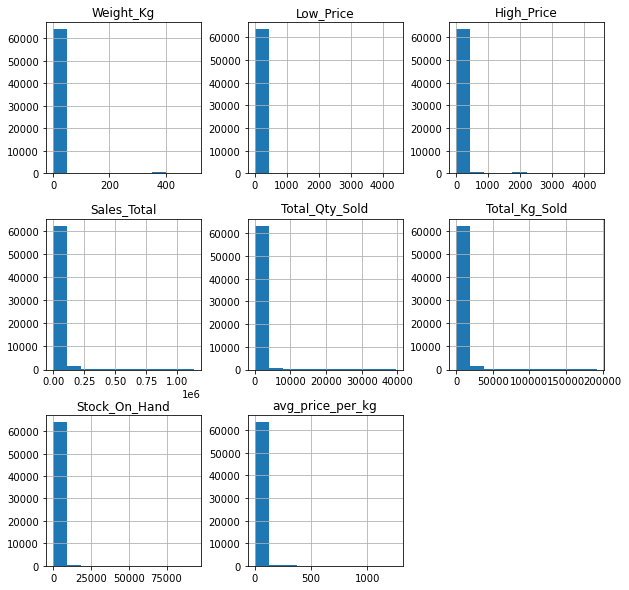

In [28]:
features = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'] # create a list of all numerical features
train[features].hist(figsize=(10,10))

If we look at the histogram, we notice that the distribution graph and histogram shows the same pattern which checking for normality

### Exploring Categorical Features

#### Bargraphs

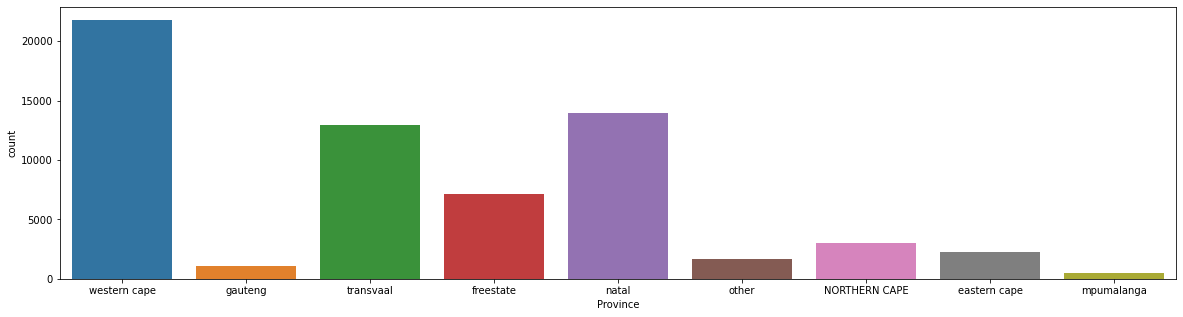

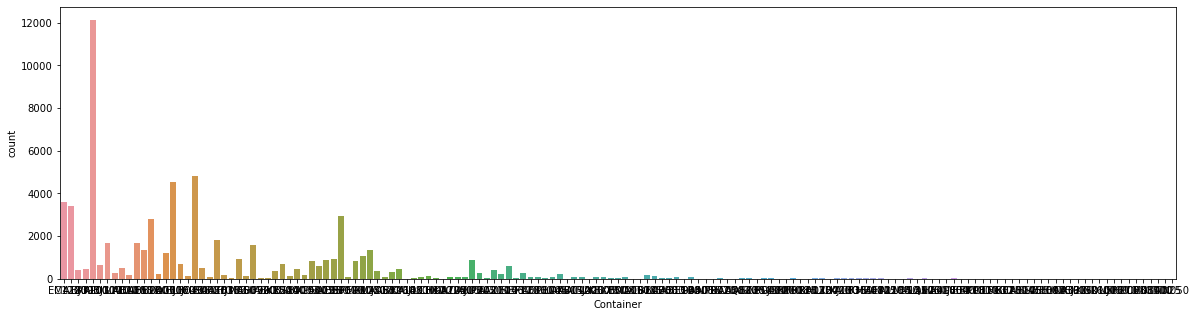

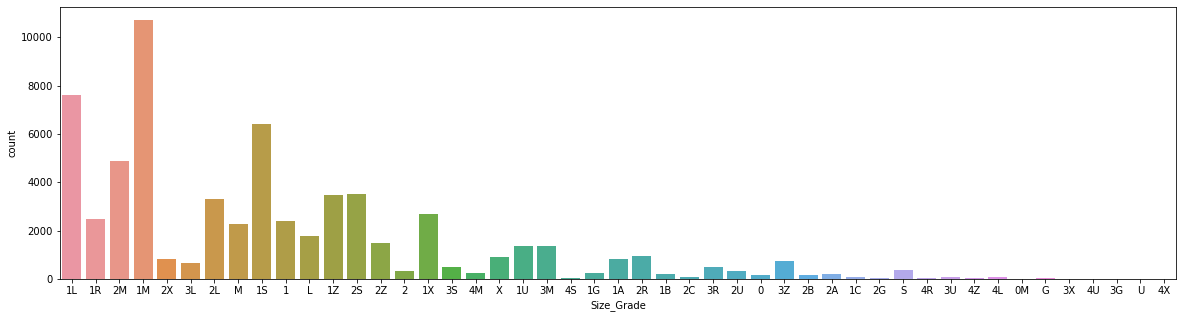

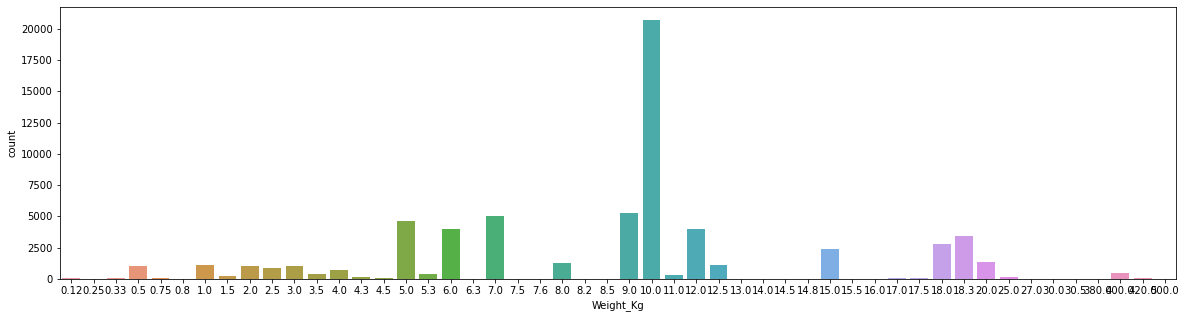

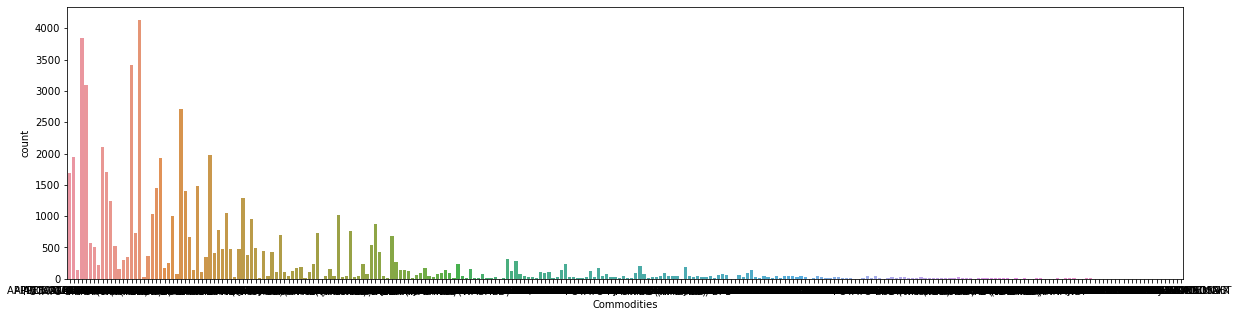

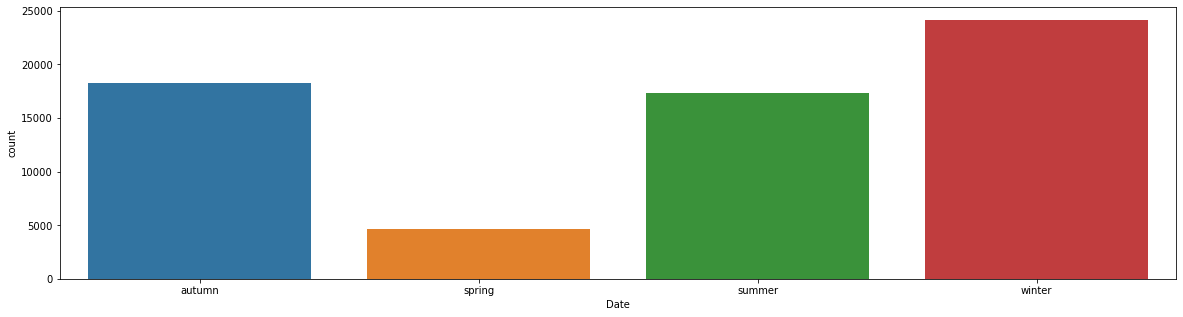

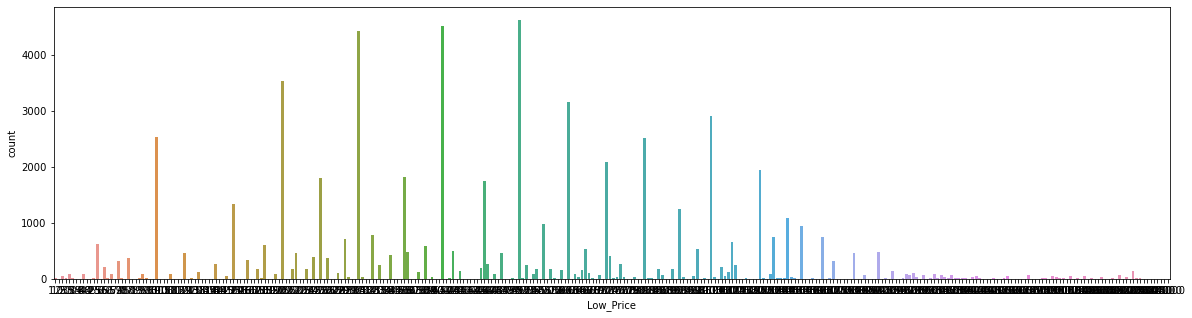

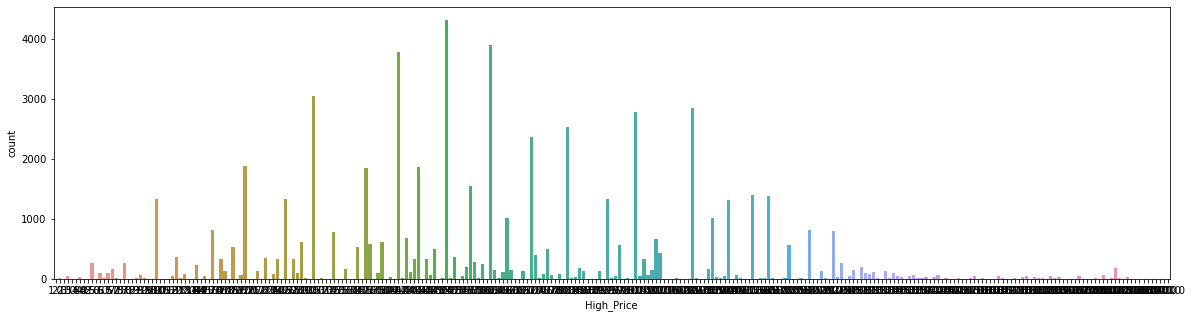

In [ ]:
for i in train.columns:
    plt.figure(figsize=(20, 5))
    sns.countplot(data= train, x= i)

### Checking for Multicollinearity

#### Pairwise

In [ ]:
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
g = pairplot(train)
g.fig.set_size_inches(12,12)

#### Correlation heatmap

In [ ]:
#Correlations
plt_size = (12, 9)
fig, ax = plt.subplots(figsize=plt_size)
sns.heatmap(train.corr(), vmin=-1, vmax=1,annot=True)

Relationship between the average price per kg of apples and other features

- We can see that high_price and low_price has a strong postive relatiopship. This violates the non-multicollinearity assumption of Linear regression.Multicollinearity hinders the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.
- We also notice a weak positive relationship on sales_total and Total_Kg_Sold
- Lastly, we can see that Total_Qty_Sold, Stock_Hand and Weight_kg has a negative weak relationship impying that they are not highly correlated 

### Feature Selection

#### Dropping columns

In [ ]:
# Droping these columns because they have low correlation with the DV and too high corr with each other
train = train.drop(['Low_Price','High_Price','Total_Kg_Sold'],axis=1) # Total_Kg_Sold - will be 0.32736
test = test.drop(['Low_Price','High_Price','Total_Kg_Sold'],axis=1) # Sales_Total

In [ ]:
# Distribution
sns.distplot(train['avg_price_per_kg'],kde=True)

In [ ]:
# Appears to be some outliers

In [ ]:
train.shape

In [ ]:
#Distribution tuning
train = train[train['avg_price_per_kg'] < 15] # 15
train = train[train['avg_price_per_kg'] > 1]  # 1

In [ ]:
sns.distplot(train['avg_price_per_kg'],kde=True)

In [ ]:
train.shape

In [ ]:
train.describe()

#### Correlation and Variable Selection

In [ ]:
train.corr()

In [ ]:
# Pruning a few more columns 
train = train.drop(['Container','Commodities','Size_Grade','Province','Stock_On_Hand','Date'],axis=1)  #  , 
test = test.drop(['Container','Commodities','Size_Grade','Province','Stock_On_Hand','Date'],axis=1) # Total_Qty_Sold ,

In [ ]:
# Corr
sns.pairplot(train)
plt.show()

### Feature Engineering

#### Dummy Variable

In [ ]:
# Creating dummy variables for the categorical data
train_dummies = pd.get_dummies(train, drop_first=True)

# Changing column names to prevent errors
train_dummies.columns = [col.replace(" ","_") for col in train_dummies.columns]
train_dummies.columns = [col.replace(")","_") for col in train_dummies.columns]
train_dummies.columns = [col.replace("(","_") for col in train_dummies.columns]
train_dummies.columns = [col.replace("-","_") for col in train_dummies.columns]
train_dummies.columns = [col.replace(".","_") for col in train_dummies.columns]
train_dummies.columns = [col.replace("/","_") for col in train_dummies.columns]

In [ ]:
train = train_dummies

In [ ]:
train_dummies.shape

#### Separating y from X variables

In [ ]:
# split predictors and response
y = train['avg_price_per_kg']
X = train.drop(['avg_price_per_kg'], axis=1)

#### Data overview the model using statsmodels.OLS

In [ ]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = train.copy()

# The dependent variable:
y_name = 'avg_price_per_kg'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

In [ ]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

In [ ]:
# Calculate correlations between predictor variables and the response variable
corrs = train.corr()['avg_price_per_kg'].sort_values(ascending=False)

In [ ]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'avg_price_per_kg']
for col in X:
    p_val = round(pearsonr(X[col], y)[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value'] <=0.05]

In [ ]:
# List of columns where p value is statistically significant
p = df_cp_sorted[df_cp_sorted['P_Value'] < 0.05]
p = p.index

In [ ]:
p

In [ ]:
len(p)

In [ ]:
X.shape

In [ ]:
# Modifing X data
# Removing all columns with a p_value greater then 0.05
for i in X:
    if i in p:
        pass
    else:
        X = X.drop(i,axis=1)

In [ ]:
# Droping a few dimensions
X.shape

### Prepping Test Data

In [ ]:
test.info()

In [ ]:
# #Convert Date from object to datetime64[ns] 
# test["Date"] = pd.to_datetime(test["Date"])
# #Extracting month from datetime and changing type to int
# test['Date'] = pd.DatetimeIndex(test['Date']).month

In [ ]:
# Month to seasons

# month_list = test['Date'].tolist()
# season_list = []

# for i in month_list:
#     if i in summer:
#         season_list.append('summer')
#     elif i in autumn:
#         season_list.append('autumn')
#     elif i in winter:
#         season_list.append('winter')
#     else:
#         season_list.append('spring')

# test['Date'] = test['Date'].astype(str)
# test['Date'] = season_list

In [ ]:
# To be removed if not going to use Province column

# Province's

# province_list_test = []

# for i in test['Province']:
#     if i in western_cape:
#         province_list_test.append('western_cape')
#     elif i in eastern_cape:
#         province_list_test.append('eastern_cape')
#     elif i in freestate:
#         province_list_test.append('freestate')
#     elif i in gauteng:
#         province_list_test.append('gauteng')
#     elif i in transvaal:
#         province_list_test.append('transvaal')
#     elif i in natal:
#         province_list_test.append('natal')
#     elif i in mpumalanga:
#         province_list_test.append('mpumalanga')
#     elif i in other:
#         province_list_test.append('other')
#     else:
#         province_list_test.append(i)

# test['Province'] = province_list_test

In [ ]:
# Creating dummy variables for the categorical data
test_dummies = pd.get_dummies(test, drop_first=True)

# Column name white space replacement
test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]

In [ ]:
test = test_dummies

In [ ]:
test.shape

In [ ]:
# If there is a dimensions mismatch in test to training data

In [ ]:
# List of columns names
test_list = test.columns.unique()

In [ ]:
# Modifing X data
# Removing columns that are not in the test data

for i in X:
    if i in test_list:
        pass
    else:
        X = X.drop(i,axis=1)

In [ ]:
X.shape

In [ ]:
test.shape

In [ ]:
# Pruning test dimensions
# Removing columns that do not apear in train data
X_dimensions = X.columns.tolist()

for i in test:
    if i in X_dimensions:
        pass
    else:
        test = test.drop(i,axis=1)

In [ ]:
test.shape

#### Implementing Scaling
Creating Standardize versions of X and y aswell as test data

In [ ]:
# Create scaler object
scaler = StandardScaler()

In [ ]:
# Create scaled version of the predictors (there is no need to scale the response)
X_standardise = scaler.fit_transform(X)

In [ ]:
# create scaled version test data as well for later use
X_standardise_test = scaler.fit_transform(test)

### Multivariate Regression Model

In [ ]:
# Create model object
lm = LinearRegression()
# Create model object for standardize training
lms = LinearRegression()

In [ ]:
# split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=12)

In [ ]:
# split into train and test 
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:
# train model
lm.fit(X_train, y_train)

In [ ]:
# train model with standardized X and y
lms.fit(s_X_train, s_y_train)

In [ ]:
# extract model intercept
beta_0 = float(lm.intercept_)
beta_0s = float(lms.intercept_)

In [ ]:
print("Intercept:", beta_0)
print("Intercept_S:", beta_0s)

In [ ]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
beta_js['Coefficient_s'] = lms.coef_

In [ ]:
# extract model coeffs
beta_jss = pd.DataFrame(lms.coef_, X.columns, columns=['Coefficient_s'])

In [ ]:
beta_js

### Ridge Regression model

In [ ]:
# Create ridge models for both data sets
ridge = Ridge()
ridge_s = Ridge()

In [ ]:
# Train the model
ridge.fit(X_train, y_train)
ridge_s.fit(s_X_train, s_y_train)

In [ ]:
# Extract the models intercept value
b0 = float(ridge.intercept_)
b0_s = float(ridge_s.intercept_)

In [ ]:
print("Intercept:", float(b0))
print("Intercept:", float(b0_s))

In [ ]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
coeff['Coefficient_s'] = ridge_s.coef_

In [ ]:
coeff

### LASSO Model

In [ ]:
# Create LASSO model's object, defualt alpha to 0.01
lasso = Lasso(alpha=0.001)
lasso_s = Lasso(alpha=0.001)

In [ ]:
# Train the LASSO model's
lasso.fit(X_train, y_train)
lasso_s.fit(s_X_train, s_y_train)

In [ ]:
# Extract intercept from model
intercept = float(lasso.intercept_)
intercept_s = float(lasso_s.intercept_)

In [ ]:
# Extract intercept
print("Intercept:", float(intercept))
print("Intercept_s:", float(intercept_s))

In [ ]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
coeff['Coefficient_s'] = lasso_s.coef_

In [ ]:
coeff

### Decision Tree Regressor

In [ ]:
# # set test size to 20 % of training data
# tX_train, tX_test, ty_train, ty_test = train_test_split(X,y,test_size=0.2,random_state=42)
# tXs_train, tXs_test, tys_train, tys_test = train_test_split(X_standardise,y,test_size=0.2,random_state=69)

In [ ]:
# DecisionTreeRegressor?

In [ ]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=50,random_state=42)
regr_tree_s = DecisionTreeRegressor(max_depth=50,random_state=69)

In [ ]:
regr_tree.fit(X_train,y_train)
regr_tree_s.fit(s_X_train,s_y_train)

In [ ]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(9,9))
# # assigned a random variable name to the plot to suppress text output
# _ = plot_tree(regr_tree, feature_names=['Numbers'],  filled=True)

### MSE Results of models

In [ ]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train)),
                        "MLR_S": metrics.mean_squared_error(s_y_train, lms.predict(s_X_train)),
                        "Ridge": metrics.mean_squared_error(y_train, ridge.predict(X_train)),
                        "Ridge_S": metrics.mean_squared_error(s_y_train, ridge_s.predict(s_X_train)),
                        "LASSO": metrics.mean_squared_error(y_train, lasso.predict(X_train)),
                        "LASSO_S": metrics.mean_squared_error(s_y_train, lasso_s.predict(s_X_train)),
                        "Tree": metrics.mean_squared_error(y_train, regr_tree.predict(X_train)),
                        "Tree_S": metrics.mean_squared_error(s_y_train, regr_tree_s.predict(s_X_train))
                    },
                'Test MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test)),
                        "MLR_S": metrics.mean_squared_error(s_y_test, lms.predict(s_X_test)),
                        "Ridge": metrics.mean_squared_error(y_test, ridge.predict(X_test)),
                        "Ridge_S": metrics.mean_squared_error(s_y_test, ridge_s.predict(s_X_test)),
                        "LASSO": metrics.mean_squared_error(y_test, lasso.predict(X_test)),
                        "LASSO_S": metrics.mean_squared_error(s_y_test, lasso_s.predict(s_X_test)),
                        "Tree": metrics.mean_squared_error(y_test, regr_tree.predict(X_test)),
                        "Tree_S": metrics.mean_squared_error(s_y_test, regr_tree_s.predict(s_X_test))
                        
                    },
                'Test RMSE':
                    {
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test))),
                        "MLR_S": math.sqrt(metrics.mean_squared_error(s_y_test, lms.predict(s_X_test))),
                        "Ridge": math.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))),
                        "Ridge_S": math.sqrt(metrics.mean_squared_error(s_y_test, ridge_s.predict(s_X_test))),
                        "LASSO": math.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))),
                        "LASSO_S": math.sqrt(metrics.mean_squared_error(s_y_test, lasso_s.predict(s_X_test))),
                        "Tree": math.sqrt(metrics.mean_squared_error(y_test, regr_tree.predict(X_test))),
                        "Tree_S": math.sqrt(metrics.mean_squared_error(s_y_test, regr_tree_s.predict(s_X_test)))
                    }
                }

In [ ]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [ ]:
results_df

In [ ]:
# Tree	1.507595e-31	0.212754	0.461253 -- 1 - 15 -- Weight_Kg	Sales_Total	Total_Qty_Sold
#


In [ ]:
# Plotting tree y_test vs y_pred

fig = plt.figure()
plt.scatter(y_test, regr_tree_s.predict(X_test))
plt.plot(y_test,y_test,"r") # perfect model line
fig.suptitle('Tree_s model', fontsize = 20)
plt.xlabel('y test', fontsize = 18)
plt.ylabel('y pred', fontsize = 16)

In [ ]:
# Plotting tree y_test vs y_pred

fig = plt.figure()
plt.scatter(y_test, regr_tree.predict(X_test))
plt.plot(y_test,y_test,"r") # perfect model line
fig.suptitle('Tree model', fontsize = 20)
plt.xlabel('Actual y', fontsize = 18)
plt.ylabel('y prediction', fontsize = 16)

#### Predictions using test data

In [ ]:
# Predictions
lm = lm.predict(test)
lms = lms.predict(X_standardise_test)
ridge = ridge.predict(test)
ridge_s = ridge_s.predict(X_standardise_test)
lasso = lasso.predict(test)
lasso_s = lasso_s.predict(X_standardise_test)
tree = regr_tree.predict(test)
tree_s = regr_tree_s.predict(X_standardise_test)

In [ ]:
tree

In [ ]:
# ridge_s = np.round(ridge_s,2)

#### Export csv

In [ ]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission_lm = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': lm
    })

submission_lms = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': lms
    })

submission_lasso = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': lasso
    })

submission_lasso_s = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': lasso_s
    })

submission_ridge = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': ridge
    })

submission_ridge_s = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': ridge_s
    })

submission_tree = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': tree
    })

submission_tree_s = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': tree_s
    })

In [ ]:
# save DataFrame to csv file for submission
submission_lm.to_csv("full set lm.csv", index=False)
submission_lms.to_csv("full set lms.csv", index=False)
submission_lasso.to_csv("full set lasso.csv", index=False)
submission_lasso_s.to_csv("full set lasso_s.csv", index=False)
submission_ridge.to_csv("full set ridge.csv", index=False)
submission_ridge_s.to_csv("full set ridge_s.csv", index=False)
submission_tree.to_csv("full set tree.csv", index=False)
submission_tree_s.to_csv("full set tree_s.csv", index=False)

### Saving a model with Pickle

In [ ]:
import pickle

model_save_path = "tree_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(regr_tree,file)

In [ ]:
X

In [ ]:
X['Weight_Kg'].max()

In [ ]:
X.shape